In [1]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import avalanches as crfn
import IS as isfn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
F10t2 = '/Volumes/Dominic 10tb2/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Avalanche calculation

## Find nearest neighbours

In [2]:
# Create lists of coord data
#---------------------------------------------------------------------------
import glob

experiment = 'PTZ-WILDTYPE'
os.chdir(F10t+ 'Project/' + experiment)
blnlist = sorted(glob.glob('*0.610bin0.23nnbav.npy*')) 
nnblist = sorted(glob.glob('*-03*BLN*nnb.npy*')) 
pnnblist = sorted(glob.glob('*PTZ20*nnb.npy*')) 
coordlist = sorted(glob.glob('*BLN_*realcoord*'))
rad = sorted(glob.glob('*radius*'))

In [ ]:
#Calculate nearest neighbours for each cell 
#-------------------------------------------------------------------------------------------------
dim = [.8, .8, 15] #define distance of each pixel in x,y,z
n_neigh = 15 #define how many nearest neighbours to include
#Fnnb = crfn.neighbour(coords, n_neigh) 

for i in range(len(newcoordlist)):
    coords =  np.multiply(newcoordlist[i], dim)   # metrically scaled coordinates (in microns)
    paramlist = [coords, n_neigh]
    adfn.parallel(2, [cntlist], crfn.neighbour, paramlist)

In [75]:
#Calculate radius for each nnb value
dim = [.8, .8, 15],
num = adfn.name_zero('front', 2, 12, 1)
numb = adfn.name_zero('back', 0.04, 0.23, 0.01)
dist = np.zeros((11,20))
count = 0
for i in num:
    os.chdir(Fdrop + 'Project/' + experiment)
    coordlist = sorted(glob.glob('*' + i +  '*BLN*realcoord.npy'))
    coord = np.load(coordlist[0])
    mcs  = np.multiply(coord, dim)     
    count1 = 0
    for e in numb:
        os.chdir(F10t + 'Project/' + experiment)
        nnblist = sorted(glob.glob('*' + i +  '*BLN*' + e + '*nnb.npy'))
        centrecell = mcs[0]
        surroundcells = mcs[np.where(np.load(nnblist[0])[0] == 1)[0]]
        distvec = np.zeros(surroundcells.shape[0])
        for t in range(surroundcells.shape[0]):
            distvec[t] = np.linalg.norm(centrecell - surroundcells[t])
        dist[count, count1] = np.max(distvec)
        count1+=1
    count+=1
    print('done' + str(i))

done02
done03
done04
done05
done06
done07
done08
done09
done10
done11
done12


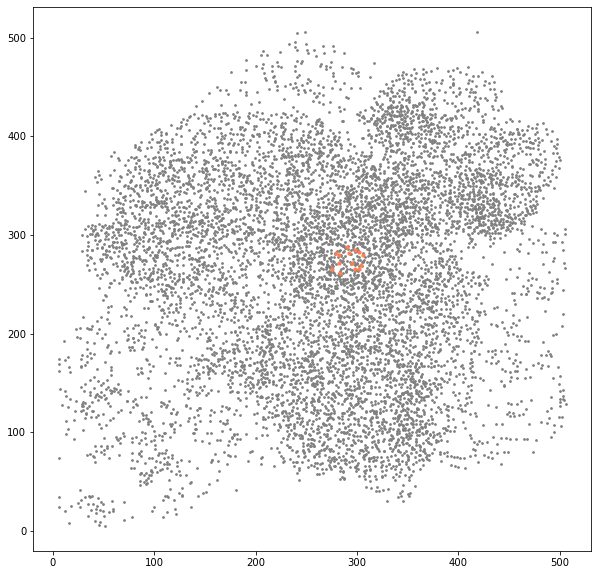

In [30]:
# Plot neighbours for an example cell
#------------------------------------------------------
cell, fnum, condition = 10 ,'02', 'BLN'

#Load coordinates
#------------------------------------------------------
os.chdir(Fdata + experiment)
coordlist = sorted(glob.glob('*' + fnum +  '*' + condition + '*realcoord.npy'))
cs = np.load(coordlist[0])             # 3D array of xyz coordinates

#Load nearest neigbours
#------------------------------------------------------
os.chdir(F10t + 'Project/' + experiment)
nnblist = sorted(glob.glob('*' + fnum +  '*' + condition + '*0.16nnb.npy'))
nnb = np.load(nnblist[0])

plt.figure(figsize = (10,10))
plt.scatter(cs[:,0][nnb[cell] == 0], cs[:,1][nnb[cell] == 0], s = 3, c = 'grey')
plt.scatter(cs[:,0][nnb[cell] == 1], cs[:,1][nnb[cell] == 1], s = 10, c = 'coral')
plt.show()

## Calculate avalanche statistics

In [ ]:
#cut in half trace (first half)
#--------------------------------
for i in range(len(binlist)):
    half = np.load(binlist[i])[:, :4914]
    np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[i][:nnblist[i].find('nnb')] + 'cutbinarised.npy', half)

In [18]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*PTZ20*0.590*binarised.npy*')) #iterated list - binarised trace
avlist =  sorted(glob.glob('*-03*PTZ20*nnbav*npy*'))

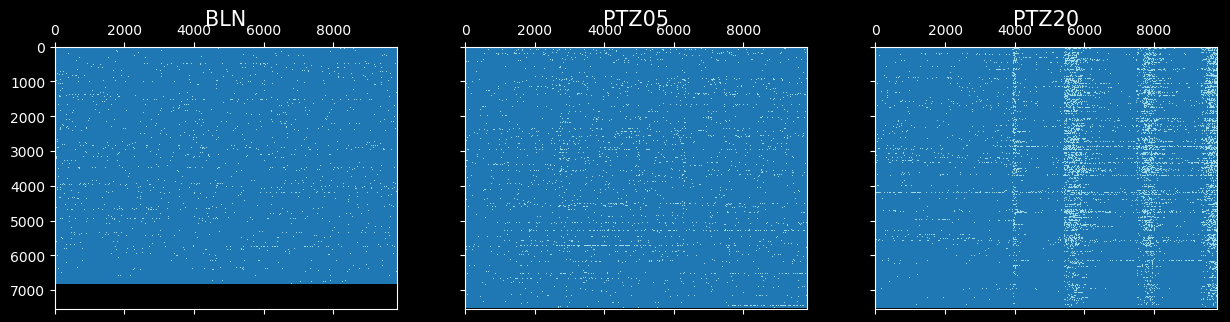

In [805]:
# PLOT - detected peaks
#---------------------------------------
pltfn.rasplot(namelist = binlist)

In [ ]:
# Avalanche calculation
#---------------------------------------------------------------------------
num = adfn.name_zero('front', 3, 3, 1)
for i in num:
    binlist = sorted(glob.glob('*-' + i +  '*PTZ20*binarised.npy*')) #iterated list - binarised trace
    nnblist = sorted(glob.glob('*-' + i + '*PTZ20*nnb.npy*')) 
    paramlist = [F10t, experiment]
    for t in range(len(binlist)):
        adfn.parallel(4, [nnblist, adfn.repeat_list(binlist[t], len(nnblist))], crfn.avalanche, paramlist)

In [33]:
# Visualise 
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdata  + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*')) 
blnlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_av.npy']

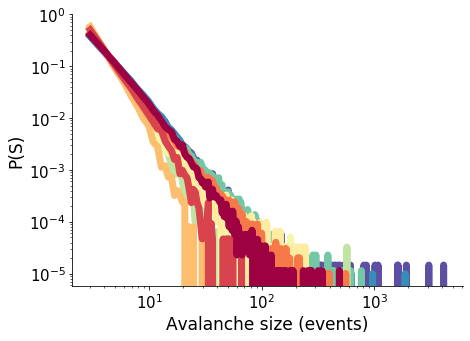

In [38]:
import seaborn as sns
from matplotlib import cm 

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

binchoose = 4300
labels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$']
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))



#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, np.load(blnlist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)

for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, binchoose)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.ylim(bottom = 0.00001)  
#plt.xlim(right = 1000)  
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(labels, size = 15)
plt.yticks(size = 15)

#plt.savefig(Ffig + 'av_size.svg', transparent = True)
plt.show()

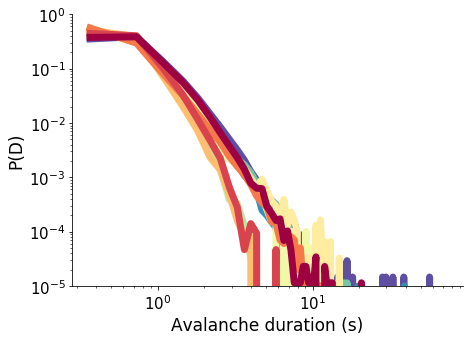

In [40]:
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))

axarr.set_prop_cycle('color', colors)
sns.reset_orig()
labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$']

binchoose = 200
fig, axarr = plt.subplots(figsize = (7,5))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, (1/2.73)*np.load(blnlist[i])[1])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = (1/2.73)*np.load(blnlist[i])[1]
    binned=np.linspace(mini,maxi, binchoose)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 100)  
plt.ylim(top = 1, bottom = 0.00001)  
axarr.set_ylabel('P(D)', size = '17')
axarr.set_xlabel('Avalanche duration (s)', size = '17')
axarr.set_xticklabels(labels, size = 15)
plt.yticks(size = 15)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.savefig(Ffig + 'av_dur.svg', transparent = True)

plt.show()

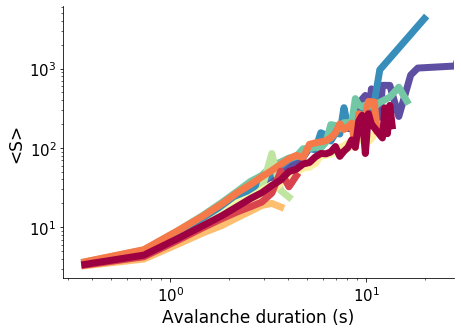

In [41]:
fig, axarr = plt.subplots(figsize = (7,5))
axarr.set_prop_cycle('color', colors)
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$']


sizelist, durlist = list(range(len(blnlist))),list(range(len(blnlist)))

for i in range(len(blnlist)):    
    avsize = np.load(blnlist[i])[0]
    avdur = (1/2.73)*np.load(blnlist[i])[1]
    sizevec, durvec = [],[]
    for e in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
        durvec = np.append(durvec, e)
    sizelist[i], durlist[i] = sizevec, durvec
for i in range(len(sizelist)):
    xaxis = np.unique(durlist[i])
    yaxis = sizelist[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('Avalanche duration (s)', size = '17')
axarr.set_ylabel('<S>', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

axarr.set_xticklabels(labels, size = 15)
plt.yticks(size = 15)

plt.xlim(right = 28)  
#plt.ylim(top = 10000)  

#plt.savefig(Ffig + 'av_sizexdur.svg', transparent = True)
plt.show()

## Exponent parameter sweep

In [ ]:
for i in num1:
    avlist =  sorted(glob.glob('*-' + i + '*BLN*nnbav.npy'))[:180]
    powerlist = list(range(200))
    lognlist = list(range(200))
    for e in range(len(avlist)):
        data = np.load(avlist[e])
        sizes=data[0,:]
        M=len(sizes)
        a=min(sizes) #define xmin
        b=max(sizes) #define xmax
        npart = 2000 #number of particles - number of draws from prior distribution
        ln=IS_LN(npart)
        po=IS(npart)
        powerlist[e] = po
        lognlist[e] = ln
        print('Done param ' + str(e) + 'for fish ' + adfn.name_template([avlist[e]], 'short'))
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[e]], 'short') + '_marglik_power.npy', powerlist)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[e]], 'short') + '_marglik_logn.npy', lognlist)
    print('Done fish ' + adfn.name_template([avlist[e]], 'short'))

In [70]:
# Avalanche size
#---------------------------------------------------------------------------
s_powlist = sorted(glob.glob('*BLN*power*size*.npy*')) 
s_loglist = sorted(glob.glob('*BLN*logn*size*'))
s_powlist, s_loglist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_param_marglik_power_size.npy'],
 ['PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn_size.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn_size.npy',
  'PTZ-WILDTYPE-0

In [71]:
shape = (180)
count=0
expsum = np.zeros((shape))
varvec = np.zeros((shape))
for i in range(shape):
    evec = []
    for t in range(len(s_powlist)):
        if type(np.load(s_powlist[t], allow_pickle=True)[i]) is not int:
            evec = np.append(evec, np.load(s_powlist[t], allow_pickle = True)[i][0])
        varvec[i] = np.var(evec)
        expsum[i] = np.sum(evec)/len(evec) 

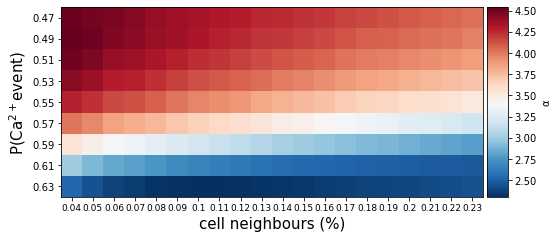

In [72]:
#SIZE - EXPONENT
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.linspace(0.03,0.23, 21)[i])

divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(expsum.shape[0]/nnbs)
expav = expsum.reshape((bcls,nnbs))    
plot1 = ax.imshow(expav, cmap = 'RdBu_r', norm = divnorm)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 9)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'α')
plt.savefig(Ffig + 'par_exp_size.svg', transparent = True)
plt.show()

In [74]:
# Create datalists
#---------------------------------------------------------------------------
d_powlist = sorted(glob.glob('*BLN*power*dur*.npy*')) 
d_loglist = sorted(glob.glob('*BLN*logn*dur*'))
d_powlist, d_loglist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_param_marglik_power_dur.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn_dur.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn_dur.npy',
  'PTZ-WILDTYPE-05_2photon_se

In [75]:
shape = (180)
count=0
expsum = np.zeros((shape))
varvec = np.zeros((shape))
for i in range(shape):
    evec = []
    for t in range(len(d_powlist)):
        if type(np.load(d_powlist[t], allow_pickle=True)[i]) is not int:
            evec = np.append(evec, np.load(d_powlist[t], allow_pickle = True)[i][0])
        varvec[i] = np.var(evec)
        expsum[i] = np.sum(evec)/len(evec) 

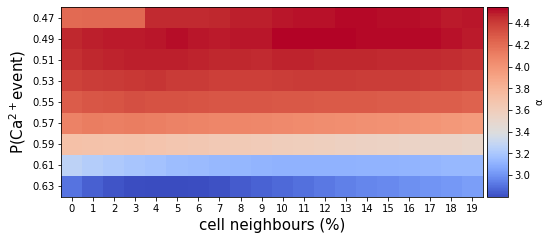

In [76]:
#SIZE - EXPONENT
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors

divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(expsum.shape[0]/nnbs)
expav = expsum.reshape((bcls,nnbs))    
plot1 = ax.imshow(expav, cmap = 'coolwarm', norm = divnorm)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
#ax.set_xticklabels(xlist, fontsize = 9)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'α')
#plt.savefig(Ffig + 'k_colbar.svg', transparent = True)
plt.show()

## Null models
* Null 1 - shuffle all - does a completely stochastic system generate avalanches?
* Null 2 - neighbour swap - is the spatial structure of cells important for generating critical avalanche dynamics?
* Null 3 - remove correlation but retain autocorrelation
* Null 4 - remove autocorrelation but retaion correlation

In [2]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(F10t + 'Project/' + experiment)
nnblist = sorted(glob.glob('*PTZ20*0.16nnb.npy*')) 
binlist = sorted(glob.glob('*PTZ20*0.59*binarised*.npy*')) 
shufflist =  sorted(glob.glob('*shuffle*.npy*')) 
nnblist, binlist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_

In [ ]:
# Null 1 - shuffle entire time series (randomise entire time series)
#------------------------------------------------------------------
import copy
num = adfn.name_zero('front', 2, 12, 1)
for i in num:
    nnblist = sorted(glob.glob('*E-' + i + '*PTZ20*nnb.npy*')) 
    binlist = sorted(glob.glob('*E-' + i +  '*PTZ20*binarised.npy*')) #iterated list - binarised trace
    shuffpkslist = list(range(50))
    for e in range(50):
        pks = np.load(binlist[0])
        rpks = copy.deepcopy(pks)
        rpks = rpks.ravel()
        np.random.shuffle(rpks) 
        rpks = np.reshape(rpks, pks.shape)
        shuffpkslist[e] = rpks
        av, pkg = crfn.avalanche1(nnblist[0], rpks, Fdrop, experiment)
        np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([nnblist][0], 'short') + '_shuffle' + str(e) + 'av.npy', av)

In [179]:
# Null 2 - swap cell location (shuffle binarised matrix) 
#---------------------------------------------------------------------------
import copy
num = adfn.name_zero('front', 3, 12, 1)
for i in num:
    nnblist = sorted(glob.glob('*-' + i + '*BLN*0.16*nnb.npy*'))
    binlist = sorted(glob.glob('*-' + i +  '*BLN*0.590*binarised.npy*')) 
    #swappkslist = list(range(10))
    for e in range(40):
        pks = np.load(binlist[0])
        rpks = copy.deepcopy(pks)
        np.random.shuffle(rpks) 
        #swappkslist[e] = rpks
        av, pkg = crfn.avalanche_r(np.load(nnblist[0]), rpks)
        np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([nnblist][0], 'short') + '_swapredo-' + str(e+10) + 'av.npy', av)
        np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([nnblist][0], 'short') + '_swapredo-' + str(e+10) + 'pkg.npy', pkg)
    print('Done' + i)

Done03
Done04
Done05
Done06
Done07
Done08
Done09
Done10
Done11
Done12


In [27]:
# Null 3 - slide time series 
#-------------------------------------------
import random
import copy

import copy
num = adfn.name_zero('front', 3, 3, 1)
for i in num:
    nnblist = sorted(glob.glob('*-' + i + '*BLN*0.16*nnb.npy*'))
    binlist = sorted(glob.glob('*-' + i +  '*BLN*0.590*binarised.npy*')) 
    slidepkslist = list(range(10))
    for e in range(10):
        pks = np.load(binlist[0])
        rpks = np.zeros((pks.shape))
        for t in range(pks.shape[0]):
            rnum = random.randint(0, pks.shape[1])
            rpks[t] = np.roll(pks[t], rnum)
        slidepkslist[e] = rpks
        av, pkg = crfn.avalanche_r(np.load(nnblist[0]), rpks)
        np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([nnblist][0], 'short') + '_slide-redo-' + str(e) + 'av.npy', av)
        np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([nnblist][0], 'short') + '_slide-redo-' + str(e) + 'pkg.npy', pkg)

In [4]:
# Null 4 - destroy autocorrelation but keep correlation (shuffle each time series across matrix - keep correlation
#-------------------------------------------
import random
import copy
num = adfn.name_zero('front', 4, 12, 1)
for i in num:
    nnblist = sorted(glob.glob('*-' + i + '*BLN*0.16*nnb.npy*'))
    binlist = sorted(glob.glob('*-' + i +  '*BLN*0.590*binarised.npy*')) 
    #autopkslist = list(range(10))
    for e in range(50):
        pks = np.load(binlist[0])
        rpks = copy.deepcopy(pks.T)
        np.random.shuffle(rpks) 
        ut_rpks = rpks.T
        av, pkg = crfn.avalanche_r(np.load(nnblist[0]), ut_rpks)
        np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([nnblist][0], 'short') + '_truauto-redo-' + str(e) + 'av.npy', av)
        np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([nnblist][0], 'short') + '_truauto-redo-' + str(e) + 'pkg.npy', pkg)
    print('Done' + i)

Done04
Done05
Done06
Done07
Done08
Done09
Done10
Done11
Done12


In [42]:
# Load null data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(F10t + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))
space_list = sorted(glob.glob('*BLN*_swap*av*'))
auto_list = sorted(glob.glob('*BLN*_auto*av*'))
corr_list = sorted(glob.glob('*BLN*_slide*av*'))

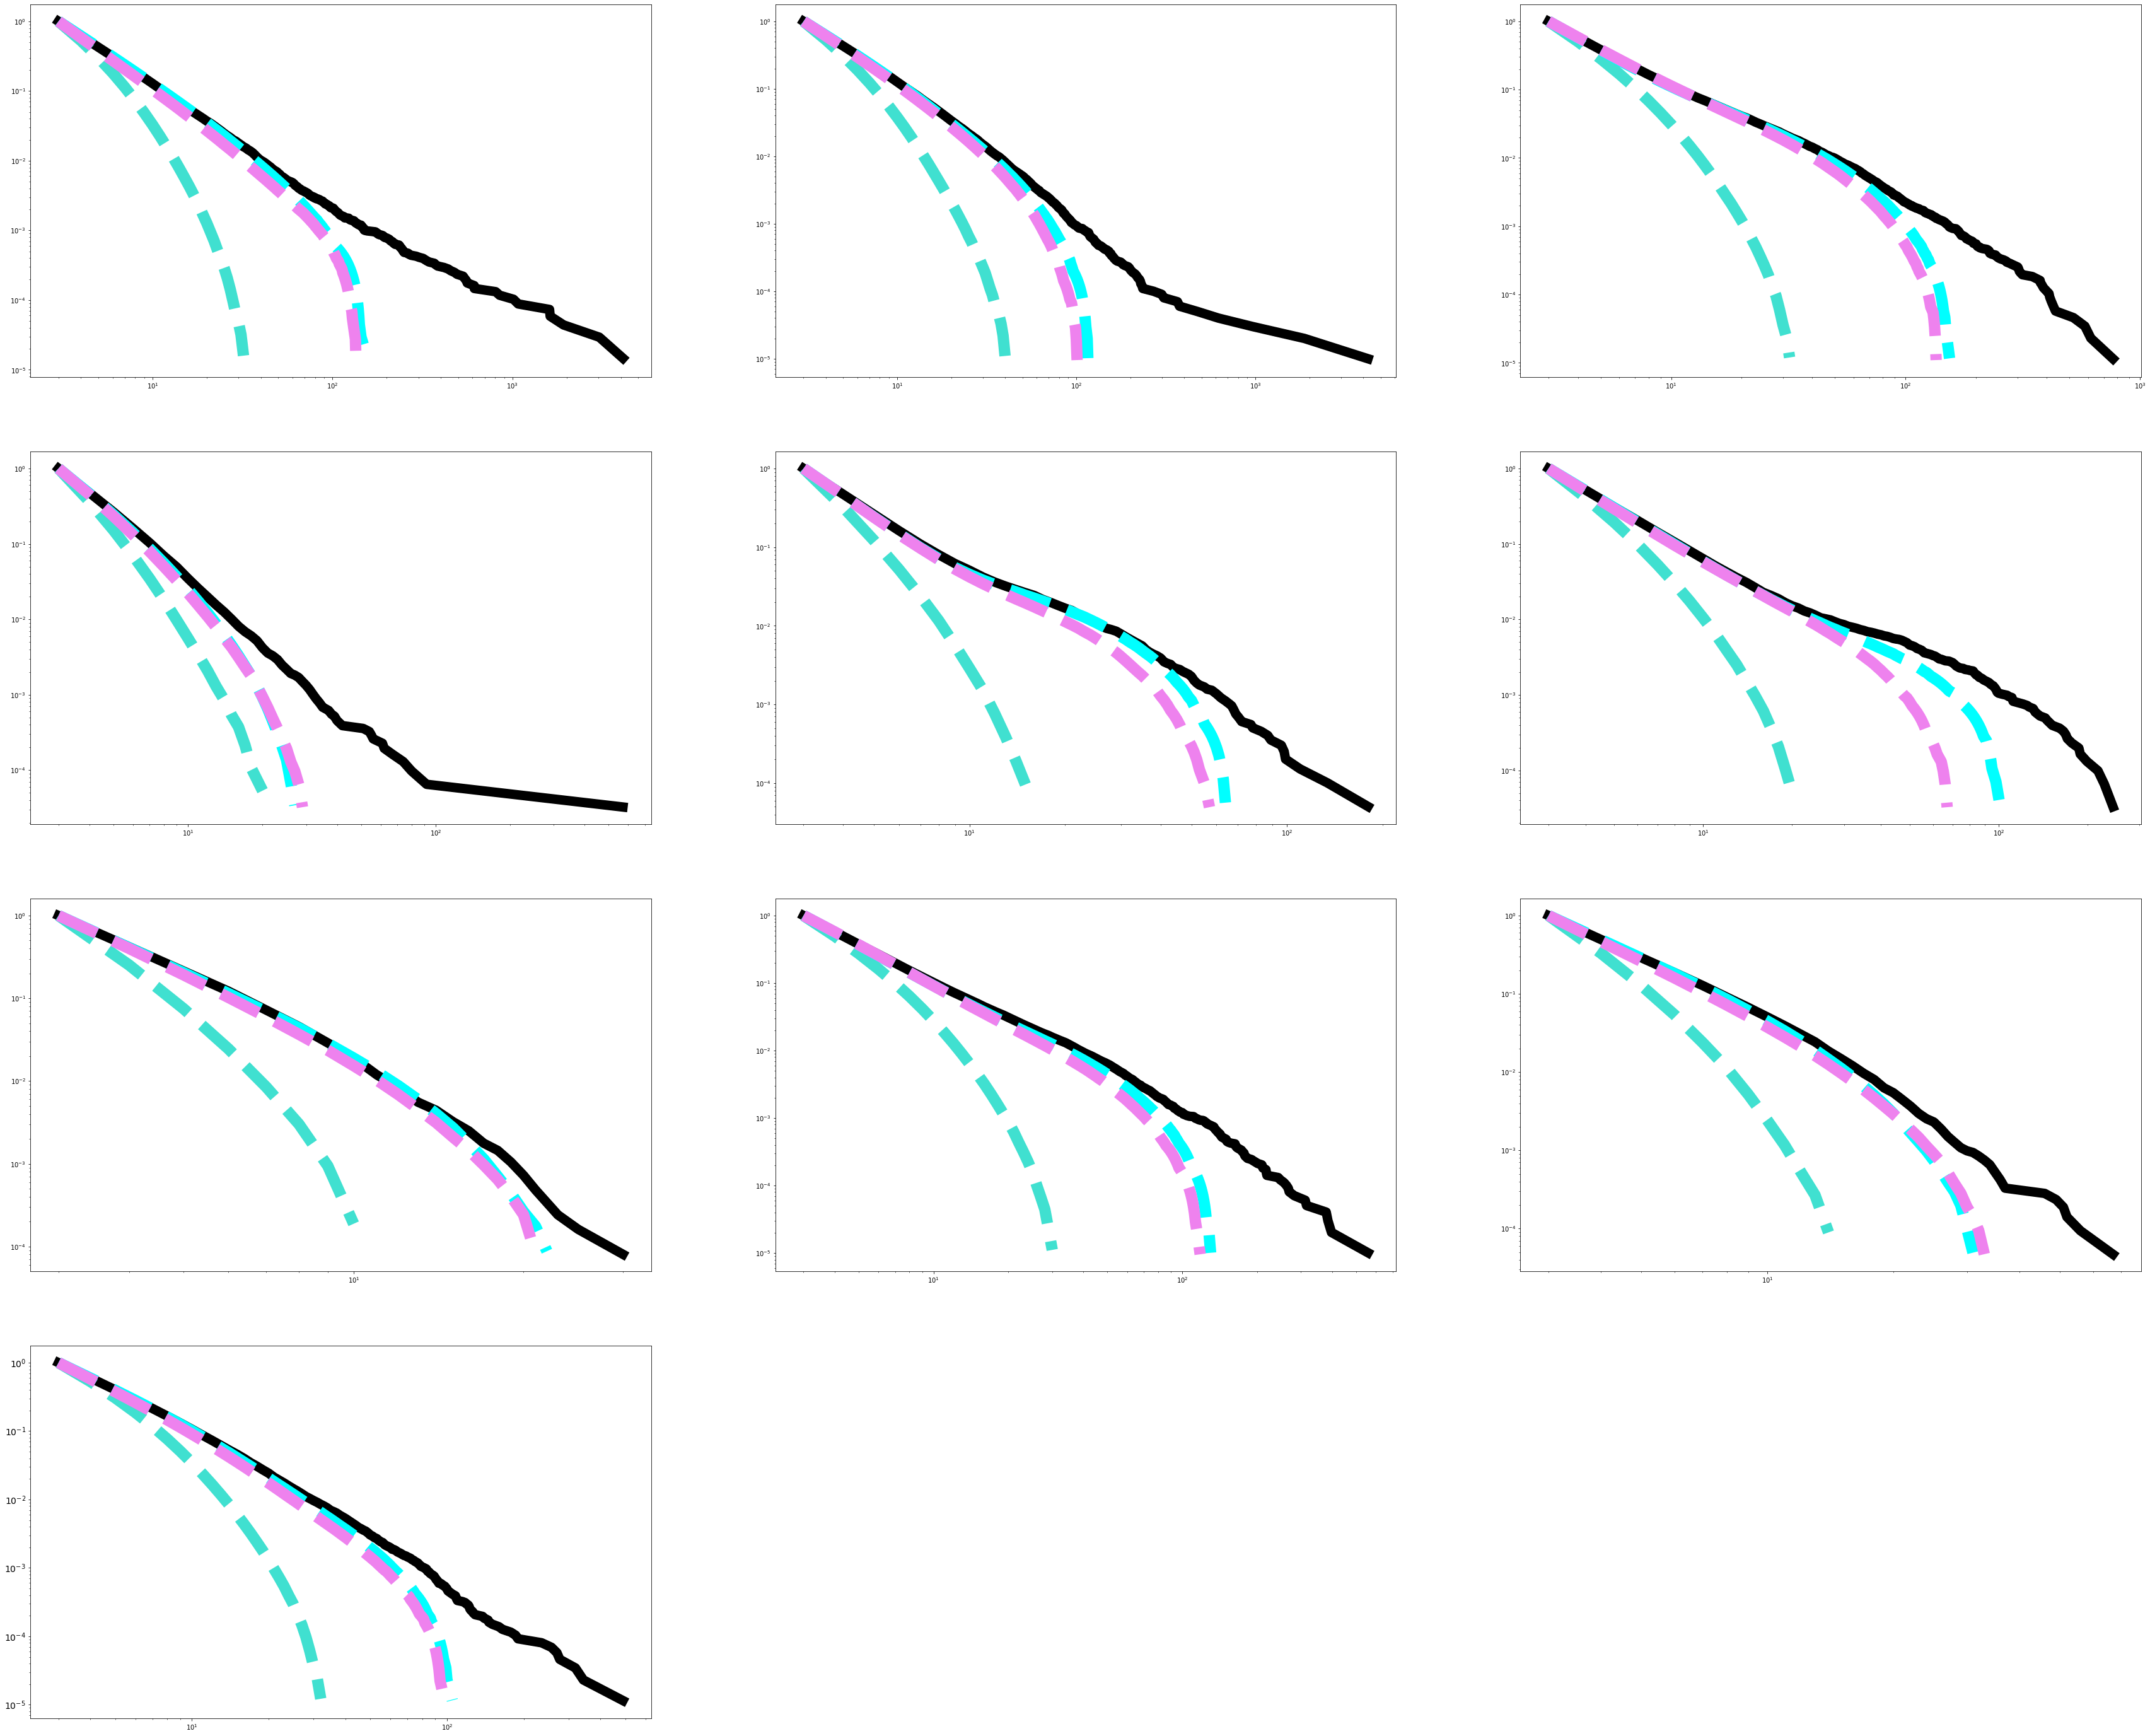

In [54]:
xlabels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$','10$^4$','10$^5$','10$^6$']


def getsize(distlist, choose):
    output_list = list(range(len(distlist)))
    for i in range(len(distlist)):
        output_list[i] = np.load(distlist[i])[choose]
    return(output_list)

sns.reset_orig()
import matplotlib
import powerlaw
colors = ['black', 'turquoise','cyan', 'violet']

num1 = adfn.name_zero('front',2,12,1)
fig = plt.figure(figsize=(60,50))
choose=0
count = 0
for i in num1:
    if i != '03':
        os.chdir(F10t + 'Project/' + experiment)
        blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
        space_list = sorted(glob.glob('*E-' + i + '*BLN*swap*av*'))
        corr_list = sorted(glob.glob('*E-' + i + '*BLN*slide*av*'))
        auto_list = sorted(glob.glob('*E-' + i + '*BLN*auto*av*'))

        
        ax = fig.add_subplot(4, 3, count+1)
        avdistcut = np.load(blnlist[0])[choose]
        powerlaw.plot_ccdf(avdistcut,  linewidth = 15, markersize = 1, alpha = 1, c = colors[0])

        nulist = [space_list, corr_list, auto_list]
        count+=1

        for e in range(len(nulist)):
            inp = getsize(nulist[e], choose)
            mean_null = adfn.mean_distribution(inp)
            powerlaw.plot_ccdf(mean_null,  linewidth = 18, markersize = 1, alpha = 1, c = colors[e+1], linestyle = '--')

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.ylim(bottom = 0.00001)  
#plt.xlim(right = 5000)  
#axarr.set_title(str(blnlist[0]), size = '13')
#axarr.set_ylabel('P(S)', size = '13')
#axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(xlabels, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()



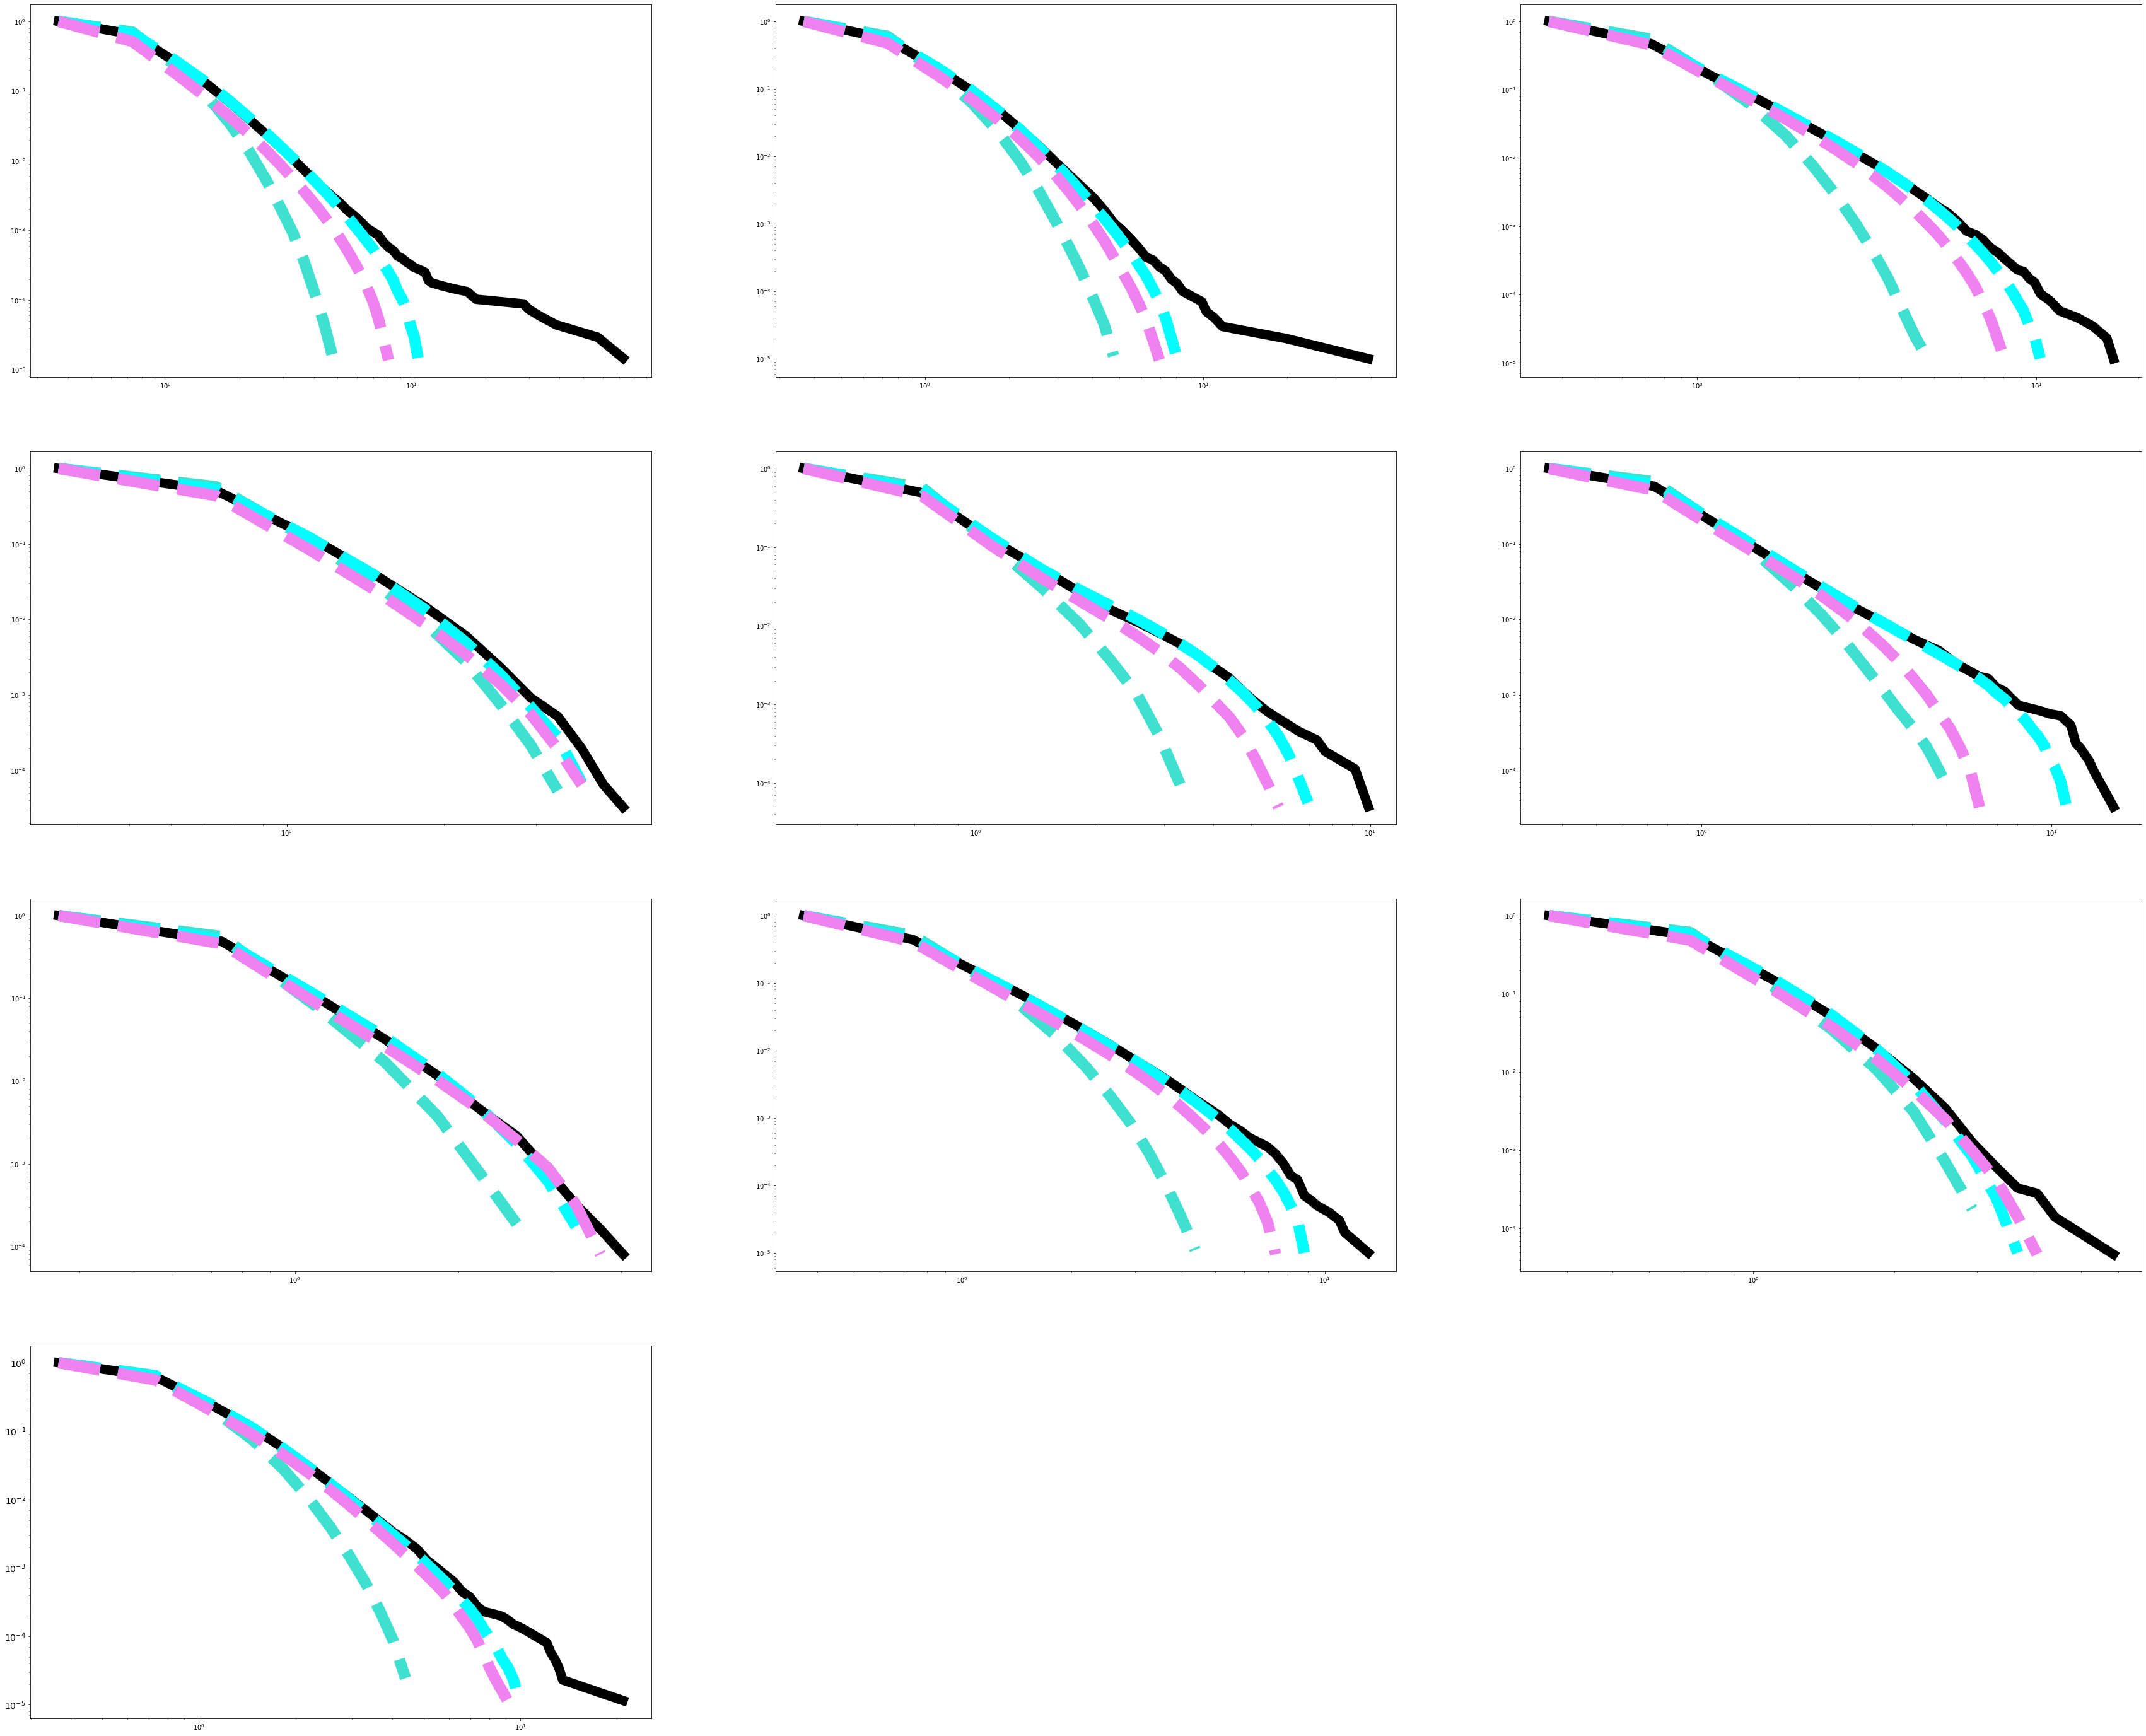

In [55]:
labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$','10$^3$']

def getsize(distlist, choose):
    output_list = list(range(len(distlist)))
    for i in range(len(distlist)):
        output_list[i] = (1/2.73)*np.load(distlist[i])[choose]
    return(output_list)

sns.reset_orig()
import matplotlib
import powerlaw
colors = ['black', 'turquoise','cyan', 'violet']

num1 = adfn.name_zero('front',2,12,1)
fig = plt.figure(figsize=(60,50))


choose=1
count = 0
for i in num1:
    if i!= '03':
        os.chdir(F10t + 'Project/' + experiment)
        blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
        space_list = sorted(glob.glob('*E-' + i + '*BLN*swap*av*'))
        corr_list = sorted(glob.glob('*E-' + i + '*BLN*slide*av*'))
        auto_list = sorted(glob.glob('*E-' + i + '*BLN*auto*av*'))

        ax = fig.add_subplot(4, 3, count+1)
        avdistcut = (1/2.73)*np.load(blnlist[0])[choose]
        powerlaw.plot_ccdf(avdistcut,  linewidth = 15, markersize = 1, alpha = 1, c = colors[0])

        nulist = [space_list, corr_list, auto_list]
        count+=1

        for e in range(len(nulist)):
            inp = getsize(nulist[e], choose)
            mean_null = adfn.mean_distribution(inp)
            powerlaw.plot_ccdf(mean_null,  linewidth = 18, markersize = 1, alpha = 1, c = colors[e+1], linestyle = '--')

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.ylim(bottom = 0.00001)  
#plt.xlim(right = 30)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(D)', size = '13')
axarr.set_xlabel('Avalanche duration (s)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(labels, fontsize = 14)
plt.yticks(fontsize = 14)
count+=1
plt.show()

In [4]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdata + experiment)
size= sorted(glob.glob('*null*size*.npy'))
dur= sorted(glob.glob('*null*dur*.npy'))
size = size[2], size[1], size[0]
dur = dur[2], dur[1], dur[0]
size, dur

(('null_ks-space-size.npy', 'null_ks-corr-size.npy', 'null_ks-auto-size.npy'),
 ('null_ks-space-dur.npy', 'null_ks-corr-dur.npy', 'null_ks-auto-dur.npy'))

In [ ]:
#Calculate the ks distance of null models


num1 = adfn.name_zero('front',2,12,1)
for choose in range(2):
    av_name = 'size', 'dur'
    for null_choose in range(3):
        null_name = ['space', 'time', 'phase']
        space_list, time_list, slide_list = [],[],[]


        null_ks = np.zeros(len(num1))
        bln_ks = np.zeros(len(num1))
        count = 0

        ks_out = list(range(2))

        def getav(distlist, choose):
            output_list = list(range(len(distlist)))
            for i in range(len(distlist)):
                output_list[i] = np.load(distlist[i])[choose]
            return(output_list)

        for x,i in enumerate(num1):
            os.chdir(Fdrop + 'Project/' + experiment)
            blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
            if null_name[null_choose] == 'space':
                space_list = sorted(glob.glob('*E-' + i + '*BLN*swapredo*av*'))
            if null_name[null_choose] == 'time':
                time_list = sorted(glob.glob('*E-' + i + '*BLN*autoredo*av*'))
            if null_name[null_choose] == 'phase':
                slide_list = sorted(glob.glob('*E-' + i + '*BLN*slideredo*av*'))

            null_list = space_list, time_list, slide_list 
            curr_bln = np.load(blnlist[0])[choose]
            av_list = getav(null_list[null_choose], choose)
            curr_mean = adfn.mean_distribution(av_list)
            bln_ks[x] = stats.ks_2samp(curr_mean, curr_bln)[0]
            fill = []
            for e in range(len(av_list)):
                fill = np.append(fill,  stats.ks_2samp(curr_mean, av_list[e])[0])
            null_ks[x] = np.mean(fill)
            
        ks_out = [bln_ks, null_ks]
        np.save(savepath + 'null_ks-' + null_name[null_choose] + '-' + av_name[choose] + '.npy', ks_out)
        print('Done ' + null_name[null_choose] + av_name[choose])

In [58]:
#SIZE - KS
listlist = size
ks_comb, cols_comb, lab_comb = [],[], []
name_list = 'spatial', 'correlation', 'autocorrelation'

for i in range(len(listlist)):
    curr_list = np.load(listlist[i], allow_pickle=True)
    curr_list1 = np.zeros((2,10))
    curr_list1[0] = np.append(curr_list[0][0],curr_list[0][2:])
    curr_list1[1] = np.append(curr_list[1][0],curr_list[1][2:])
    cols_comb = np.append(cols_comb, np.hstack((adfn.repeat_list('emp', len(curr_list1[0])), adfn.repeat_list(name_list[i], len(curr_list1[1]) ))))
    ks_comb = np.append(ks_comb, np.hstack((curr_list1[0], curr_list1[1])))
    lab_comb = np.append(lab_comb, adfn.repeat_list(name_list[i], (10*2)))

size_df = pd.DataFrame({"ks":ks_comb , "Labels": lab_comb  , "colour":cols_comb})

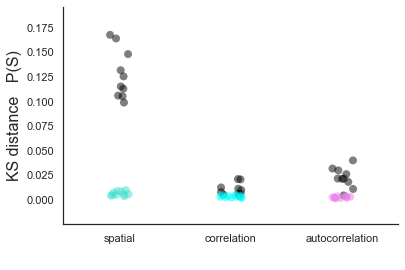

In [60]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors = ['black', 'turquoise','cyan', 'violet']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.stripplot(x="Labels", y="ks", data=size_df, hue = 'colour', palette = colors, size = 8, jitter = True ,alpha = 0.5)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '16')
ax.set_ylabel('KS distance   P(S)', size = '16')
#ax.set_xticklabels(['Baseline', 'inter-ictal', 'ictal'], size = 15)
ax.legend_.remove()
#plt.savefig(Ffig + 'null_ks_size.svg', transparent = True)
plt.show()

In [61]:
space = size_df[size_df['Labels'] == 'spatial']
corr = size_df[size_df['Labels'] == 'correlation']
auto = size_df[size_df['Labels'] == 'autocorrelation']

emp_space = space[space['colour'] == 'emp']
null_space = space[space['colour'] == 'spatial']
emp_corr = corr[corr['colour'] == 'emp']
null_corr = corr[corr['colour'] == 'correlation']
emp_auto = auto[auto['colour'] == 'emp']
null_auto = auto[auto['colour'] == 'autocorrelation']
null_list = emp_space, null_space, emp_corr, null_corr, emp_auto, null_auto

In [63]:
from scipy import stats

for i in range(len(null_list)):
    p = stats.normaltest(null_list[i]['ks'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [64]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp_space['ks'], null_space['ks'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 16.57216583802582   p = 4.733211769276278e-08
Samples are significantly different


In [65]:
#Time
alpha = 0.05/3

t, p = stats.ttest_rel(emp_corr['ks'], null_corr['ks'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 3.856282447731823   p = 0.0038689812430855786
Samples are significantly different


In [66]:
#Phase
alpha = 0.05/3

t, p = stats.ttest_rel(emp_auto['ks'], null_auto['ks'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 6.2852154565092215   p = 0.00014348372280852578
Samples are significantly different


In [5]:
#DURATION - KS
listlist = dur
ks_comb, cols_comb, lab_comb = [],[], []
name_list = 'spatial', 'correlation', 'autocorrelation'

for i in range(len(listlist)):
    curr_list = np.load(listlist[i], allow_pickle=True)
    curr_list1 = np.zeros((2,10))
    curr_list1[0] = np.append(curr_list[0][0],curr_list[0][2:])
    curr_list1[1] = np.append(curr_list[1][0],curr_list[1][2:])
    cols_comb = np.append(cols_comb, np.hstack((adfn.repeat_list('emp', len(curr_list1[0])), adfn.repeat_list(name_list[i], len(curr_list1[1]) ))))
    ks_comb = np.append(ks_comb, np.hstack((curr_list1[0], curr_list1[1])))
    lab_comb = np.append(lab_comb, adfn.repeat_list(name_list[i], (10*2)))

dur_df = pd.DataFrame({"ks":ks_comb , "Labels": lab_comb  , "colour":cols_comb})

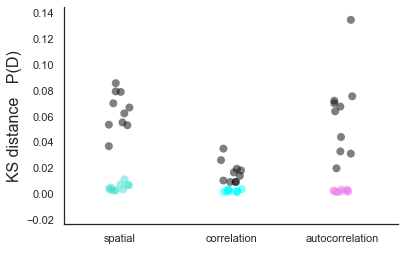

In [7]:
import seaborn as sns
from matplotlib.collections import PathCollection
sns.set(style="white")
colors = ['black', 'turquoise','cyan', 'violet']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.stripplot(x="Labels", y="ks", data=dur_df, hue = 'colour', palette = colors, size = 8, jitter = True ,alpha = 0.5)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('KS distance   P(D)', size = '16')
#ax.set_xticklabels(['Baseline', 'inter-ictal', 'ictal'], size = 15)
ax.legend_.remove()
#plt.savefig(Ffig + 'null_ks_dur.svg', transparent = True)
plt.show()


In [8]:
space = dur_df[dur_df['Labels'] == 'spatial']
corr = dur_df[dur_df['Labels'] == 'correlation']
auto = dur_df[dur_df['Labels'] == 'autocorrelation']

emp_space = space[space['colour'] == 'emp']
null_space = space[space['colour'] == 'spatial']
emp_corr = corr[corr['colour'] == 'emp']
null_corr = corr[corr['colour'] == 'correlation']
emp_auto = auto[auto['colour'] == 'emp']
null_auto = auto[auto['colour'] == 'autocorrelation']
null_list = emp_space, null_space, emp_corr, null_corr, emp_auto, null_auto

In [10]:
from scipy import stats
for i in range(len(null_list)):
    p = stats.normaltest(null_list[i]['ks'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [11]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp_space['ks'], null_space['ks'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 13.025620067556138   p = 3.817887762988487e-07
Samples are significantly different


In [12]:
#Time
alpha = 0.05/3

t, p = stats.ttest_rel(emp_corr['ks'], null_corr['ks'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 5.742469807355878   p = 0.00027893090473908144
Samples are significantly different


In [13]:
#Phase
alpha = 0.05/3

t, p = stats.ttest_rel(emp_auto['ks'], null_auto['ks'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 5.704394021729182   p = 0.0002926755530837891
Samples are significantly different


# Loglikelihood ratio

In [43]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
blnlist = sorted(glob.glob('*BLN*_av.npy*')) 
blnlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_av.npy']

In [45]:
# Calculate loglikelihood ratio
size_llr, dur_llr = np.zeros(len(blnlist)), np.zeros(len(blnlist))
for i in range(len(blnlist)):
    curr = crfn.marglik_power_loglik(np.load(blnlist[i]), 2000) 
    size_llr[i] =  curr[0][1] - curr[2][2]
    dur_llr[i] = curr[1][1] - curr[3][2]
    print(i)

0
1
2
3
4
5
6
7
8
9


In [46]:
#LOGLIK RATIO
fli = list(range(10))
for i in range(10):
    fli[i] = 'F' + str(i+2)
llr_df = pd.DataFrame({"LLR":size_llr ,"Fish": fli, "Labels": adfn.repeat_list('Size', 10)})

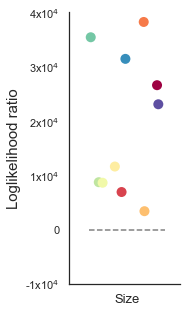

In [47]:
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
sns.set(style="white")
#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
fig, ax = plt.subplots(figsize = (2,5))
ax = sns.stripplot(x="Labels", y="LLR", data=llr_df, hue = 'Fish', palette = colors, size = 10, jitter = True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(bottom = -10000)  
ax.set_ylabel('Loglikelihood ratio', size = '15')
ax.set_yticklabels(['-1x10$^{4}$','0','1x10$^{4}$', '2x10$^{4}$', '3x10$^{4}$', '4x10$^{4}$', '5x10$^{4}$', '6x10$^{4}$','7x10$^{4}$'])
ax.set_xticklabels(['Size'], size = 13)
plt.hlines(1, -0.1 ,0.1, linestyle = '--', color = 'grey')
ax.set_xlabel(' ', size = '13')
ax.legend_.remove()
#plt.savefig(Ffig + 'llr_size.svg', transparent = True)
plt.show()

In [48]:
#LOGLIK RATIO
fli = list(range(10))
for i in range(10):
    fli[i] = 'F' + str(i+2)
llr_df = pd.DataFrame({"LLR":dur_llr ,"Fish": fli, "Labels": adfn.repeat_list('Dur', 10)})

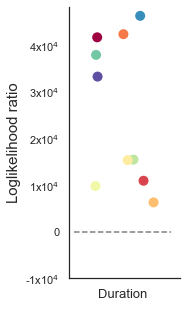

In [49]:
from matplotlib import cm

colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
sns.set(style="white")
#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
fig, ax = plt.subplots(figsize = (2,5))
ax = sns.stripplot(x="Labels", y="LLR", data=llr_df, hue = 'Fish', palette = colors, size = 10, jitter = True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(bottom = -10000)  
ax.set_ylabel('Loglikelihood ratio', size = '15')
ax.set_yticklabels(['-1x10$^{4}$','0','1x10$^{4}$', '2x10$^{4}$', '3x10$^{4}$', '4x10$^{4}$', '5x10$^{4}$', '6x10$^{4}$','7x10$^{4}$'])
ax.set_xticklabels(['Duration'], size = 13)
plt.hlines(1, -0.1 ,0.1, linestyle = '--', color = 'grey')
ax.set_xlabel(' ', size = '13')
ax.legend_.remove()
#plt.savefig(Ffig + 'llr_dur.svg', transparent = True)
plt.show()

In [79]:
# Parameter sweep for LLR
#---------------------------------------------------------------------------
s_powlist = sorted(glob.glob('*BLN*power*size*.npy*'))[1:]
s_loglist = sorted(glob.glob('*BLN*logn*size*'))
s_powlist, s_loglist

(['PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_param_marglik_power_size.npy'],
 ['PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn_size.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn_size.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn_size.npy',
  'PTZ-WILDTYPE-07

In [80]:
shape = (180)
mratio = np.zeros((shape))
for i in range(shape):
    powvec, logvec = 0,0
    for t in range(len(s_powlist)):
        if type(np.load(s_powlist[t], allow_pickle=True)[i]) is not int:
            powvec = powvec + np.load(s_powlist[t], allow_pickle = True)[i][1]
            logvec = logvec +  np.load(s_loglist[t], allow_pickle = True)[i][2]
    mratio[i] = powvec - logvec

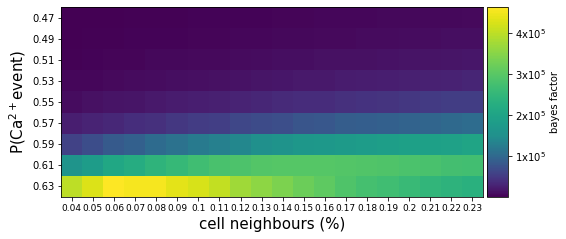

In [81]:
#MARGINAL LIKELIHOOD
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors


divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(mratio.shape[0]/nnbs)
margav = mratio.reshape((bcls,nnbs))    
plot1 = ax.imshow(margav, cmap = 'viridis', norm=divnorm)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 9)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'bayes factor')
cbar0.ax.set_yticklabels(['1x10$^{5}$', '2x10$^{5}$', '3x10$^{5}$', '4x10$^{5}$', '5x10$^{5}$', '6x10$^{5}$'])  # vertically oriented colorbar
#plt.savefig(Ffig + 'par_LLR_size.svg', transparent = True)
plt.show()

In [82]:
shape = (180)
mratio = np.zeros((shape))
for i in range(shape):
    powvec, logvec = 0,0
    for t in range(len(d_powlist)):
        if type(np.load(d_powlist[t], allow_pickle=True)[i]) is not int:
            powvec = powvec + np.load(d_powlist[t], allow_pickle = True)[i][1]
            logvec = logvec +  np.load(d_loglist[t], allow_pickle = True)[i][2]
    mratio[i] = powvec - logvec

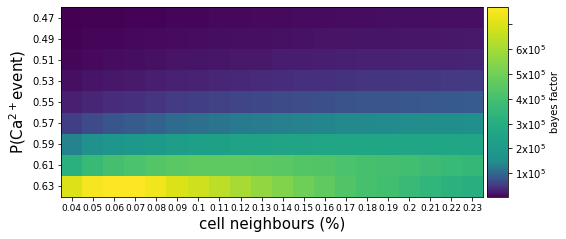

In [83]:
#MARGINAL LIKELIHOOD
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors


divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(mratio.shape[0]/nnbs)
margav = mratio.reshape((bcls,nnbs))    
plot1 = ax.imshow(margav, cmap = 'viridis', norm=divnorm)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 9)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'bayes factor')
cbar0.ax.set_yticklabels(['1x10$^{5}$', '2x10$^{5}$', '3x10$^{5}$', '4x10$^{5}$', '5x10$^{5}$', '6x10$^{5}$'])  # vertically oriented colorbar
plt.show()

# Exponent relation

In [19]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdata + experiment)
bln_dcc = sorted(glob.glob('*BLN*DCC.npy*')) 
foc_dcc = sorted(glob.glob('*_PTZ05*DCC.npy*')) 
gen_dcc = sorted(glob.glob('*_PTZ20*DCC.npy*')) 
space_dcc = sorted(glob.glob('*DCC*swap*')) 
corr_dcc = sorted(glob.glob('*DCC*slide*')) 
auto_dcc = sorted(glob.glob('*DCC*auto*')) 
space_dcc, corr_dcc, auto_dcc

(['null_DCC-swap.npy'], ['null_DCC-slide.npy'], ['null_DCC-auto.npy'])

In [ ]:
#Calculate empirical exponent relation

for i in range(len(av_list)):
    curr_av = np.load(av_list)
    dcc = crfn.DCC(curr_av)

In [ ]:
#Calculate null exponnt relation

null_list = np.load(swap_dcc[0])
name_list = 'spatial'

dcc_comb = []
lab_comb = []
plot_comb, col_comb = [],[]

dcc_list = [bln_dcc]

for i in range(len(dcc_list)):
    for y in range(11):
        dcc_comb = np.append(dcc_comb, np.load(dcc_list[i][y] ,allow_pickle=True))
        lab_comb = np.append(lab_comb,'empirical')
        plot_comb = np.append(plot_comb, 1)
        col_comb = np.append(col_comb, y+1)
        
count=1
for i in range(len(null_list)):
    dcc_comb = np.append(dcc_comb, null_list[i])
    lab_comb = np.append(lab_comb,name_list)
    plot_comb = np.append(plot_comb, 1)
    col_comb = np.append(col_comb, 0)


null_df = pd.DataFrame({"dcc":dcc_comb , "Labels": lab_comb, 'Plot': plot_comb.astype(int), 'Col': col_comb.astype(int)})
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))

col_list = list(range(len(colors ) + 1))
for i in range(len(colors)+1):
    if i == 0:
        col_list[i] = 'lightgrey'
    else:
        col_list[i] = colors[i-1]

In [29]:
from matplotlib import cm

dcc = np.zeros((10))
lab =list(range(10))

dcc_list = [bln_dcc]
count=0
for i in range(len(dcc_list)):
    for y in range(10):
        dcc[count] = np.load(dcc_list[i][y] ,allow_pickle=True)
        lab[count] = 'empirical'
        count+=1


listlist = space_dcc, corr_dcc, auto_dcc
name_list = 'spatial', 'corr.', 'autocorr.'

dcc_comb = dcc
lab_comb = lab

for i in range(len(listlist)):
    for e in range(len(listlist[i])):
        for x in range(len(np.load(listlist[i][e]))):
            if x!= 1:
                dcc_comb = np.append(dcc_comb, np.load(listlist[i][e])[x])
                lab_comb = np.append(lab_comb,name_list[i])
                              
col_comb = list(range(len(dcc_comb)))
for i in range(len(dcc_comb)):
    if i > 9:
        col_comb[i] = 0
    else:
        col_comb[i] = i+1

null_df = pd.DataFrame({"dcc":dcc_comb , "Labels": lab_comb, 'Col': col_comb})

colors  = cm.Spectral_r(np.linspace(0,1,len(bln_dcc)))
col_list = list(range(len(colors ) + 1))
for i in range(len(colors)+1):
    if i == 0:
        col_list[i] = 'lightgrey'
    else:
        col_list[i] = colors[i-1]

In [30]:
col_list

['lightgrey',
 array([0.36862745, 0.30980392, 0.63529412, 1.        ]),
 array([0.21607074, 0.55563245, 0.73194925, 1.        ]),
 array([0.45305652, 0.78154556, 0.64628989, 1.        ]),
 array([0.74771242, 0.89803922, 0.62745098, 1.        ]),
 array([0.94425221, 0.97770088, 0.66205306, 1.        ]),
 array([0.99777009, 0.93087274, 0.63306421, 1.        ]),
 array([0.99346405, 0.74771242, 0.43529412, 1.        ]),
 array([0.96378316, 0.47743176, 0.28581315, 1.        ]),
 array([0.84721261, 0.26120723, 0.30519031, 1.        ]),
 array([0.61960784, 0.00392157, 0.25882353, 1.        ])]

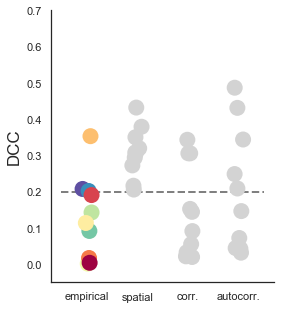

In [32]:
import matplotlib 
import seaborn as sns
sns.set(style="white")
fig, ax = plt.subplots(figsize = (4,5))
colors  = cm.Spectral_r(np.linspace(0,1,len(bln_dcc)))

ax = sns.stripplot(x="Labels", y="dcc", data=null_df, hue = 'Col', palette = col_list, jitter = True, size = 16, alpha = 1)
plt.hlines(0.2, -0.5 ,3.5, color = 'grey',  linestyle = '--', linewidth = 2, zorder = 1)
ax.set_ylabel('DCC', size = '17')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '20')
plt.ylim(-0.05,0.7)
ax.legend_.remove()

#plt.savefig(Ffig + 'null_DCC.svg', transparent = True)
plt.show()

In [33]:
emp = null_df[null_df['Labels'] == 'empirical']
space = null_df[null_df['Labels'] == 'spatial']
corr = null_df[null_df['Labels'] == 'corr.']
auto = null_df[null_df['Labels'] == 'autocorr.']
null_list = emp['dcc'], space['dcc'], corr['dcc'], auto['dcc']

In [34]:
for i in range(len(null_list)):
    p = stats.normaltest(null_list[i])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


In [35]:
from scipy import stats
data = emp['dcc']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.13226028743987198 0.03523868402311583


In [36]:
from scipy import stats
data = space['dcc']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.3084142399664453 0.021772153638037996


In [37]:
from scipy import stats
data = corr['dcc']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.1471536946738002 0.04021486960927059


In [38]:
from scipy import stats
data = auto['dcc']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.20562093613067822 0.05324232702555519


In [39]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp['dcc'], space['dcc'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -4.800720035134744   p = 0.0009727432570091757
Samples are significantly different


In [40]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp['dcc'], corr['dcc'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -0.4843170823005113   p = 0.6397288009033959
Samples are the same


In [41]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp['dcc'], auto['dcc'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -1.595701560364621   p = 0.14501983179493855
Samples are the same


In [87]:
# DCC parameter sweep
#---------------------------------------------------------------------------
os.chdir(F10t + 'Project/' + experiment)
dcc_list = sorted(glob.glob('*DCC*sweep*'))
dcc_list

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09-DCC-sweep.npy']

In [ ]:
num = adfn.name_zero('front', 4, 12, 1)
for i in num:
    av_list = sorted(glob.glob('*-' + i + '*BLN*av*'))[:180]
    nnb = np.arange(4, 24)
    bcl = np.arange(0.47, 0.63, 0.02)
    curr_fish = np.zeros((nnb.shape[0], bcl.shape[0])).T

    count=0
    for e in range(curr_fish.shape[0]):
        for x in range(curr_fish.shape[1]):
            curr_av = np.load(av_list[count])
            curr_fish[e][x] = crfn.DCC(curr_av)
            count+=1
    name = adfn.name_template([av_list][0], 'short') 
    np.save(savepath + name + '-DCC-sweep.npy', curr_fish)
    print('DOne ' + str(i))

In [88]:
shape = (180)
dcc_sum = np.zeros((10, shape))
count=0
for e in range(len(dcc_list)):
    curr = np.load(dcc_list[e])
    flat = np.ravel(curr)
    for x in range(len(flat)):
        dcc_sum[e, x] = flat[x]

dcc_mean = np.zeros(180)
for i in range(dcc_sum.shape[1]):
    dcc_mean[i] = np.sum(dcc_sum[:,i])/ np.where(dcc_sum[:,i] >0)[0].shape[0]

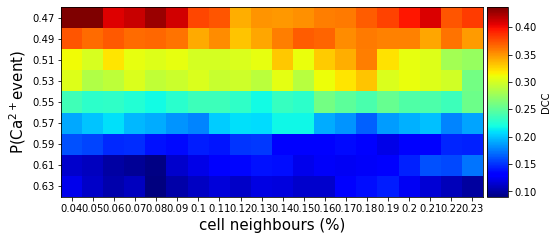

In [89]:
#DCC
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.linspace(0.03,0.23, 21)[i])
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))

nnbs = 20
bcls = 9 #np.int(b_mean.shape[0]/nnbs)
mean_mat = dcc_mean[:180].reshape((bcls,nnbs))    
plot1 = ax.imshow(mean_mat, cmap = 'jet')
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'DCC')
#plt.savefig(Ffig + 'par_dcc.svg', transparent = True)
plt.show()

# Branching ratio

In [54]:
# Create datalists
#---------------------------------------------------------------------------
null_blist = sorted(glob.glob('*null*branch*'))
null_blist = null_blist[2], null_blist[1], null_blist[0]
null_blist

('null_branch-space.npy', 'null_branch-corr.npy', 'null_branch-auto.npy')

In [ ]:
#Calculate BR in empirical data

for i in range(len(pkg_list)):
    br = crfn.branch(np.load(pkg_list[i]), np.load(av_list[i]))
    name = pkg_list[i][:pkg_list[i].find('pkg')] 
    np.save(savepath + name + '-branch.npy', br)
    print('Done ' + str(i))

In [ ]:
#Calculate BR in null models
num1 = adfn.name_zero('front',2,12,1)
for null_choose in range(3):
    null_name = ['space', 'time', 'phase']
    space_list, time_list, slide_list = [],[],[]

    bln_branch = np.zeros(len(num1))
    null_branch = np.zeros(len(num1))
    count = 0
    br_out = list(range(2))
    for x,i in enumerate(num1):
        os.chdir(Fdrop + 'Project/' + experiment)
        bln_list = sorted(glob.glob('*E-' + i + '*BLN*_branch.npy*'))
        if null_name[null_choose] == 'space':
            space_list = sorted(glob.glob('*E-' + i + '*BLN*swapredo*branch*'))
        if null_name[null_choose] == 'time':
            time_list = sorted(glob.glob('*E-' + i + '*BLN*autoredo*branch*'))
        if null_name[null_choose] == 'phase':
            slide_list = sorted(glob.glob('*E-' + i + '*BLN*slideredo*branch*'))

        null_list = space_list, time_list, slide_list 
        br_list = null_list[null_choose]
        bln_branch[x] = np.load(bln_list[0])

        fill = []
        for e in range(len(br_list)):
            fill = np.append(fill,  np.load(br_list[e]))
        null_branch[x] = np.mean(fill)

    br_out = [bln_branch, null_branch]
    np.save(savepath + 'null_branch-' + null_name[null_choose]  + '.npy', br_out)
    print('Done ' + null_name[null_choose])

In [56]:
import pandas as pd

listlist = null_blist
br_comb, lab_comb = [],[]

cols_comb = np.append(adfn.repeat_list('empirical', 10), np.append(adfn.repeat_list('spatial', 10), np.append(adfn.repeat_list('corr.', 10), adfn.repeat_list('autocorr.', 10))))
br_comb = np.load(listlist[0])[0]
br_comb1 = np.append(br_comb[0],br_comb[2:])
for i in range(len(listlist)):
    curr_list = np.load(listlist[i])[1]
    curr_list1 = np.zeros((10))
    curr_list1 = np.append(curr_list[0],curr_list[2:])
    for e in range(len(curr_list1)):
        br_comb1 = np.append(br_comb1, curr_list1[e])
        
        
col_comb = list(range(len(br_comb1)))
for i in range(len(br_comb1)):
    if i > 9:
        col_comb[i] = 0
    else:
        col_comb[i] = i+1


colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
col_list = list(range(len(colors ) + 1))
for i in range(len(colors)+1):
    if i == 0:
        col_list[i] = 'lightgrey'
    else:
        col_list[i] = colors[i-1]

br_df = pd.DataFrame({"BR":br_comb1 , "Labels": cols_comb, 'Col': col_comb})

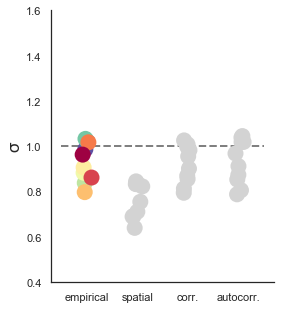

In [57]:
import matplotlib 
import seaborn as sns
colors = ['black', 'turquoise','cyan', 'violet']
sns.set(style="white")
fig, ax = plt.subplots(figsize = (4,5))

ax = sns.stripplot(x="Labels", y="BR", data=br_df, hue = 'Col', palette = col_list, jitter = True, size = 16, alpha = 1)
#plt.hlines(np.mean(branchdf['branch ratio']), -0.02 ,0.02, linestyle = '-', color = 'k', lw=4.5)
plt.hlines(1, -0.5 ,3.5, color = 'grey',  linestyle = '--', linewidth = 2, zorder = 1)
ax.set_ylabel('σ', size = '17')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '20')
ax.legend_.remove()
plt.ylim(0.4,1.6)
#plt.savefig(Ffig + 'null_BR.svg', transparent = True)
plt.show()

In [58]:
emp = br_df[br_df['Labels'] == 'empirical']
space = br_df[br_df['Labels'] == 'spatial']
corr = br_df[br_df['Labels'] == 'corr.']
auto = br_df[br_df['Labels'] == 'autocorr.']
null_list = emp['BR'], space['BR'], corr['BR'], auto['BR']


In [59]:
for i in range(len(null_list)):
    p = stats.normaltest(null_list[i])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


In [60]:
from scipy import stats
data = emp['BR']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.9310323831499296 0.026644529874785532


In [61]:
from scipy import stats
data = space['BR']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.7663531746607617 0.024458319346485624


In [62]:
from scipy import stats
data = corr['BR']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.9208932311788915 0.02680490688403883


In [63]:
from scipy import stats
data = auto['BR']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.9326093127918627 0.031115974858644296


In [64]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp['BR'], space['BR'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 21.849427384688596   p = 4.1564617850164745e-09
Samples are significantly different


In [65]:
#Time
alpha = 0.05/3

t, p = stats.ttest_rel(emp['BR'], corr['BR'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 4.452870646815863   p = 0.0015935747121959402
Samples are significantly different


In [66]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp['BR'], auto['BR'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -0.2799720500965227   p = 0.7858273294285794
Samples are the same


In [90]:
num = adfn.name_zero('front', 2, 12,1)
shape = (200)
b_sum = np.zeros((11, shape))
count=0
for e in num:
    if e!= '03':
        branchlist =  sorted(glob.glob('*E-*' + e + '*BLN*_branch.npy'))
        for i in range(len(branchlist)):
            b_sum[count,i] = np.load(branchlist[i])
        count+=1

b_mean = np.zeros(200)

for i in range(b_sum.shape[1]):
    b_mean[i] = np.sum(b_sum[:,i])/ np.where(b_sum[:,i] >0)[0].shape[0]

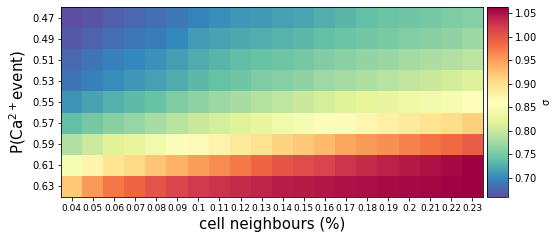

In [91]:
#BRANCHING RATIO
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.linspace(0.03,0.23, 21)[i])
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = 9 #np.int(b_mean.shape[0]/nnbs)
bmean_mat = b_mean[:180].reshape((bcls,nnbs))    
plot1 = ax.imshow(bmean_mat, cmap = 'Spectral_r')
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 9)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'σ')
#plt.savefig(Ffig + 'par_BR.svg', transparent = True)
plt.show()

# Correlation function

In [68]:
# Create lists of trace data
#---------------------------------------------------------------------------

tracelist = sorted(glob.glob('*BLN*cut*realtrace*')) 
coordlist = sorted(glob.glob('*BLN*realcoord*')) 
distlist = sorted(glob.glob('*BLN*dist.npy*')) 
binlist = sorted(glob.glob('*BLN*_corrdist_bins.*'))
tracelist, binlist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_cutrealtrace.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE

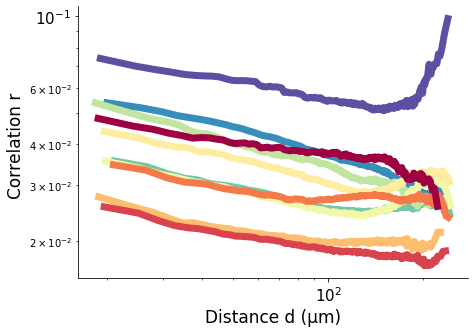

In [69]:
import matplotlib
from matplotlib import cm

colors  = cm.Spectral_r(np.linspace(0,1,len(binlist)))
sns.reset_orig()
fig, axarr = plt.subplots(figsize = (7,5))
slope = list(range(len(binlist)))
for i in range(len(binlist)):
    xaxis = (np.load(binlist[i])[0]*0.8)
    #curr = np.load(binlist[i])[1][:150]
    #yaxis = curr / np.mean(curr)
    yaxis = np.load(binlist[i])[1]
    axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = 7, alpha = 1, c = colors[i])
    #m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1][1:150]), np.log10(yaxis[:len(xaxis)-1][1:150]), 1)
    #y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
    #plt.plot(xaxis[:len(xaxis)-1][1:], y_fit[:len(xaxis)-1][1:], linestyle = '--', linewidth = 2, c = colors[i], alpha = 1)

axarr.set_xscale('log')
axarr.set_yscale('log')
#axarr.set_xlim(right = 220)
axarr.set_xlabel('Distance d (μm)', size = '17')
#axarr.set_xticklabels(['100', '100', '100', '100'])
axarr.set_ylabel('Correlation r ', size = '17')
plt.xticks(size = 15)
plt.yticks(size = 15)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.savefig(Ffig + 'fcd.svg', transparent = True)
plt.show()